In [33]:
import itertools
import openturns as ot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dependence.tests import func_sum
from dependence.tests.test_functions import func_cum_sum_weight
from dependence import ConservativeEstimate
from dependence import quantile_func
from dependence import iterative_vine_minimize
from dependence.dependence_plot import matrix_plot_results
from dependence.dependence_plot import plot_iterative_results


%matplotlib inline
%load_ext autoreload
%autoreload 2

random_state = 123
np.random.seed(random_state)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
dim = 10
margins = [ot.Normal()]*dim
alpha = 0.05
q_func = quantile_func(alpha)
families = np.tril(np.ones((dim, dim)), k=1)

In [24]:
n_influencial_pairs = 3
val_influencial = 1.
val_non_influencial = 0.0
corr_dim = dim * (dim-1)/2

all_pairs = np.asarray(list(itertools.combinations(range(dim), 2)))
selected_pairs = all_pairs[np.random.choice(range(corr_dim), size=n_influencial_pairs, replace=False)]

power = np.zeros((dim, dim))
for i in range(1, dim):
    for j in range(i):
        if [j, i] in selected_pairs.tolist():
            print [i, j]
            power[i, j] = val_influencial
        else:
            power[i, j] = val_non_influencial
test_func = lambda x: func_cum_sum_weight(x, power)
print(power)

[6, 1]
[6, 3]
[6, 5]


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.]])

In [25]:
n = 10000
quant_estimate = ConservativeEstimate(model_func=test_func, margins=margins, families=families)
indep_result = quant_estimate.independence(n_input_sample=n, q_func=q_func, random_state=random_state)[0]

In [26]:
algorithm_parameters = {
    "n_input_sample": n,
    "n_dep_param_init": 20,
    "max_n_pairs": 1,
    "grid_type": 'lhs',
    "q_func": q_func,
    "n_add_pairs": 1,
    "n_remove_pairs": 0,
    "adapt_vine_structure": False,
    "with_bootstrap": False,
    "verbose": False,
    "iterative_save": False,
    "iterative_load": False,
    "load_input_samples": False,
    "keep_input_samples": False
}

iterative_results = iterative_vine_minimize(estimate_object=quant_estimate, **algorithm_parameters)

n=10000. Worst quantile of [(1, 0)] at -5.82027587253
n=10000. Worst quantile of [(2, 0)] at -5.84725997009
n=10000. Worst quantile of [(2, 1)] at -5.8178487115
n=10000. Worst quantile of [(3, 0)] at -5.81223741795
n=10000. Worst quantile of [(3, 1)] at -6.23903450385
n=10000. Worst quantile of [(3, 2)] at -5.79501673188
n=10000. Worst quantile of [(4, 0)] at -5.827584993
n=10000. Worst quantile of [(4, 1)] at -5.80494032906
n=10000. Worst quantile of [(4, 2)] at -5.8885399955
n=10000. Worst quantile of [(4, 3)] at -5.89136753181
n=10000. Worst quantile of [(5, 0)] at -5.81837863312
n=10000. Worst quantile of [(5, 1)] at -6.21484974651
n=10000. Worst quantile of [(5, 2)] at -5.80543883997
n=10000. Worst quantile of [(5, 3)] at -6.33473305793
n=10000. Worst quantile of [(5, 4)] at -5.77539505177
n=10000. Worst quantile of [(6, 0)] at -5.81009776191
n=10000. Worst quantile of [(6, 1)] at -6.96034863108
n=10000. Worst quantile of [(6, 2)] at -5.88843982787
n=10000. Worst quantile of [(6, 

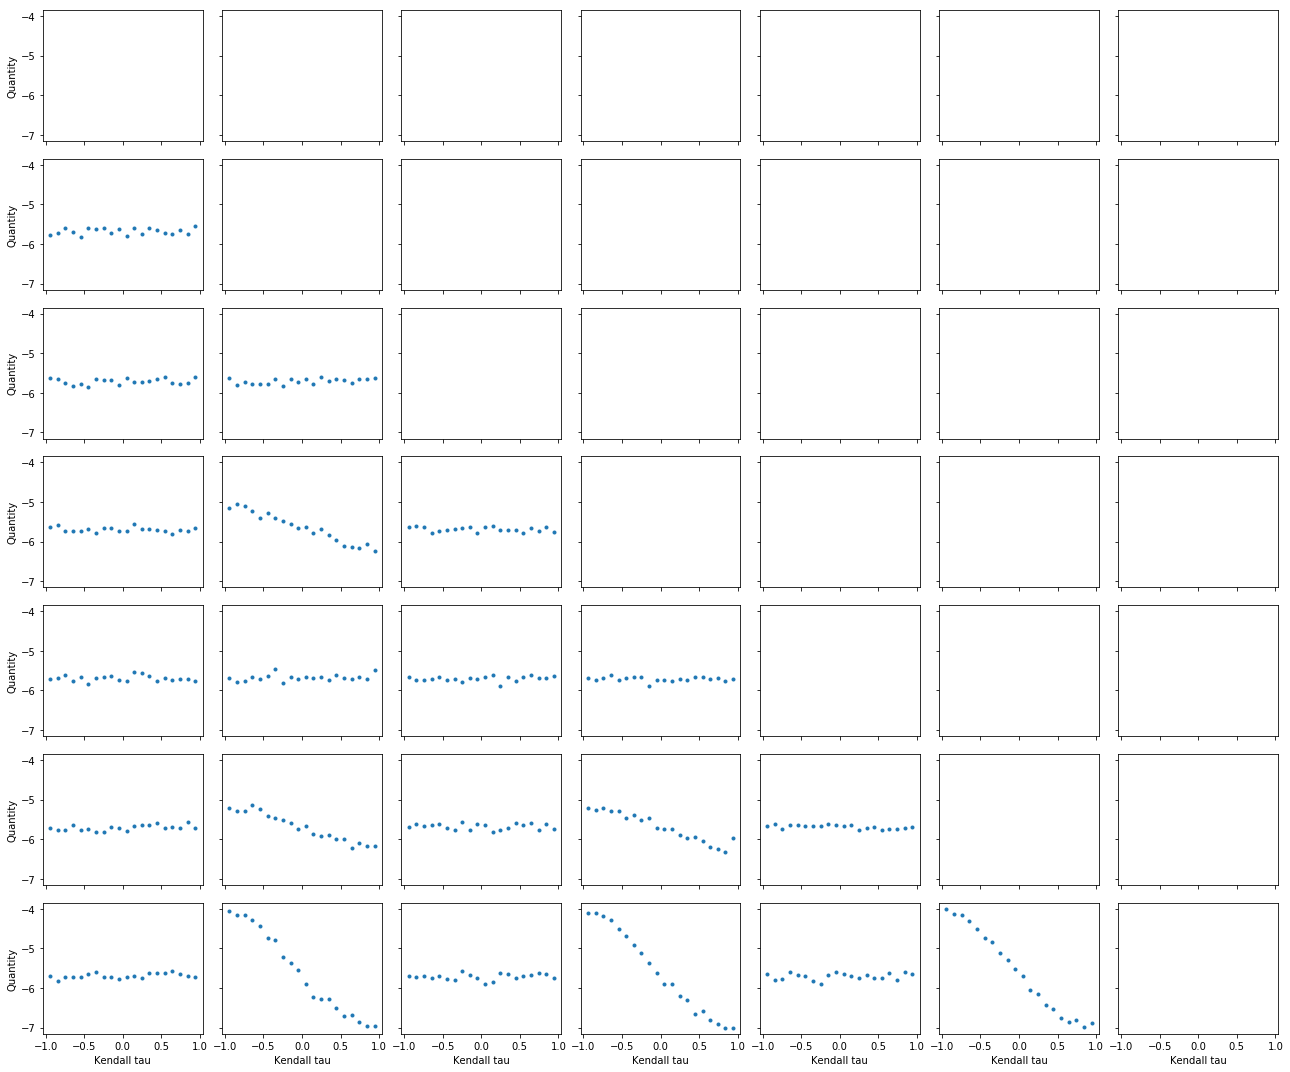

In [27]:
results = iterative_results[0]
matrix_plot_results(results, figsize=(18, 15))
plt.savefig('output/matrix_plot.png')

In [38]:
algorithm_parameters = {
    "n_input_sample": n,
    "n_dep_param_init": None,
    "max_n_pairs": 4,
    "grid_type": 'vertices',
    "q_func": q_func,
    "n_add_pairs": 1,
    "n_remove_pairs": 2,
    "adapt_vine_structure": False,
    "with_bootstrap": False,
    "verbose": True,
    "iterative_save": False,
    "iterative_load": False,
    "load_input_samples": False,
    "keep_input_samples": False
}

quant_estimate = ConservativeEstimate(model_func=func, margins=margins, families=families)

iterative_results = iterative_vine_minimize(estimate_object=quant_estimate, **algorithm_parameters)

n=10000. Worst quantile of [(1, 0)] at -5.60632756166
n=10000. Worst quantile of [(2, 0)] at -5.74550218326
n=10000. Worst quantile of [(2, 1)] at -5.70016184988
n=10000. Worst quantile of [(3, 0)] at -5.77129286498
n=10000. Worst quantile of [(3, 1)] at -6.1296591011
n=10000. Worst quantile of [(3, 2)] at -5.68449654442
n=10000. Worst quantile of [(4, 0)] at -5.86956702871
n=10000. Worst quantile of [(4, 1)] at -5.70362350736
n=10000. Worst quantile of [(4, 2)] at -5.71023249057
n=10000. Worst quantile of [(4, 3)] at -5.72383970327
n=10000. Worst quantile of [(5, 0)] at -5.8805623082
n=10000. Worst quantile of [(5, 1)] at -6.10685401041
n=10000. Worst quantile of [(5, 2)] at -5.78481885414
n=10000. Worst quantile of [(5, 3)] at -6.07903070306
n=10000. Worst quantile of [(5, 4)] at -5.67632407711
n=10000. Worst quantile of [(6, 0)] at -5.77740310344
n=10000. Worst quantile of [(6, 1)] at -6.94150765176
n=10000. Worst quantile of [(6, 2)] at -5.73459860714
n=10000. Worst quantile of [(6

In [40]:
K = 500
grid_type = 'lhs'
grid_results = quant_estimate.gridsearch_minimize(n_dep_param=K, n_input_sample=n, grid_type=grid_type, q_func=q_func)

In [41]:
grid_results.min_quantity

-9.7088151509468332

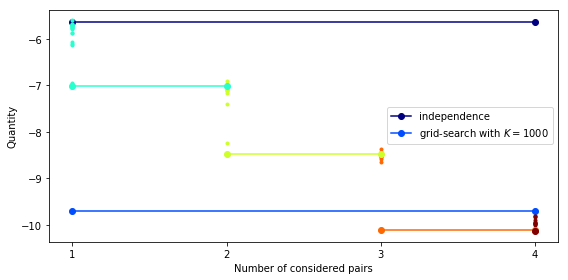

In [43]:
plot_iterative_results(iterative_results, indep_result=indep_result, grid_result=grid_results.min_result, q_func=q_func)

In [ ]:
K = 500
grid_type = 'vertices'
grid_results_vertices = quant_estimate.gridsearch_minimize(n_dep_param=K, n_input_sample=n, grid_type=grid_type, q_func=q_func)

In [ ]:
grid_results.min_quantity

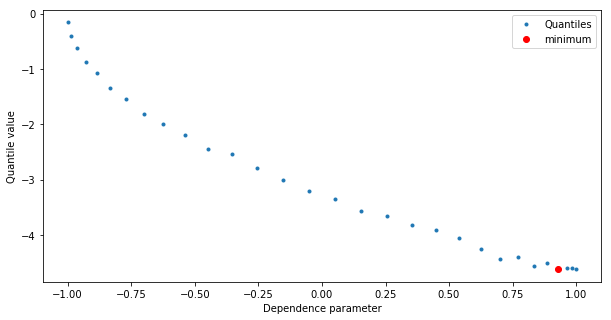

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(grid_result.dep_params, grid_result.quantities, '.', label='Quantiles')
ax.plot(min_result.dep_param[0], min_result.quantity, 'ro', label='minimum')
ax.set_xlabel('Dependence parameter')
ax.set_ylabel('Quantile value')
ax.legend(loc=0)